# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## 선형회귀(Linear Regression)

<hr/>

### 공부한 시간과 성적의 상관관계

### 모델 정의

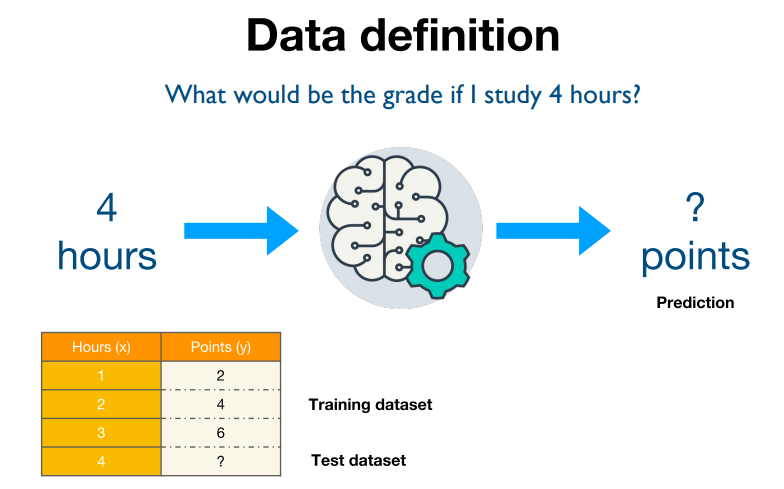

In [1]:
import numpy as np
import torch

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])  # 입력
y_train = torch.FloatTensor([[2], [4], [6]])  # 출력

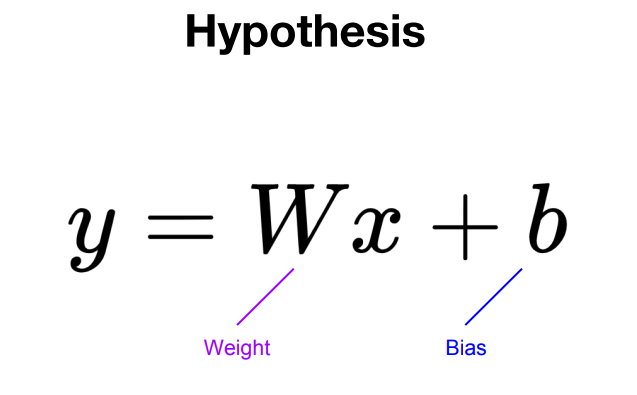

- Weight와 Bias를 0으로 초기화 (어떤 입력을 받든 항상 출력이 0이 될 것을 예측)
- requires_grad=True (학습할 것이라고 명시)

In [4]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

### 학습

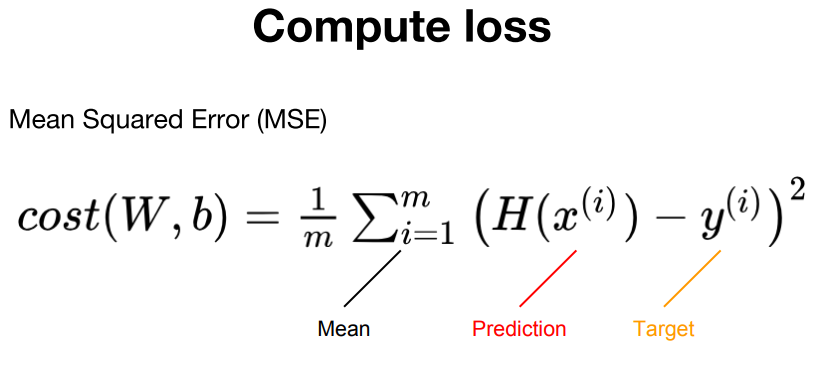

학습을 하려면 우리의 모델이 정답과 얼마나 가까운지를 파악해야하는데 이것을 수치로 나타낸 것이 loss 또는 cost이다. 이 loss를 계산하는 함수가 MSE 함수이다.

MSE는 Mean Squared Error(평균제곱오차)로, 추측값에 대한 정확성을 측정하는 방법이다. 정한 값에 대한 정확도를 측정하는 쉬운 방법이기 때문에 자주 쓰인다. 머신러닝에서는 Cost Function(손실함수 혹은 비용함수)에서, 영상처리에서는 화질 개선을 위해 원본 대비 화질을 측정하는 PSNR에서 주로 쓰인다.

<br/>

파이토치에서는 **torch.mean**을 이용해 위의 공식을 아주 간단하게 1줄로 적을 수 있다!!

In [5]:
cost = torch.mean((hypothesis - y_train) ** 2)

<br/>

### 경사하강법 (Gradient descent)

#### torch.optim 라이브러리 사용

- [W, b]는 학습할 Tensor들
- lr = 0.01은 learning rate(학습률)

<br/>

#### 아래 3줄을 같이 사용해야한다.

- zero_grad()로 gradient 초기화
- backward()로 gradient 계산
- step()으로 개선

In [8]:
import torch.optim as optim

optimizer = optim.SGD([W, b], lr=0.01)  # 학습률 0.01

optimizer.zero_grad()
cost.backward()
optimizer.step()

<br/>

### 학습 코드 정리

#### 한 번만 해도 되는 것들

1. 데이터 정의
2. Hypothesis 초기화
3. Optimizer 정의

<br/>

#### 반복해야하는 것들

1. Hypothesis 예측
2. Cost 계산
3. Optimizer로 학습

In [9]:
x_train = torch.FloatTensor([[1], [2], [3]])  # 입력
y_train = torch.FloatTensor([[2], [4], [6]])  # 출력

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)  # 학습률 0.01

epochs = 1000
for epochs in range(1, epochs+1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

print("Complete!")

Complete!
